In [12]:
import os
import random
import xml.etree.ElementTree as ET
from copy import copy

In [13]:
# get all files in path
files = (file for file in os.listdir("../NOAH-Corpus") if file.endswith(".xml"))
# create dictionary for words and their frequencies
words = {}

# iterate through files
for file in files:
    # parse xml file
    print(file)
    tree = ET.parse(open("../NOAH-Corpus/" + file, "r", encoding="utf-8"))
    # get root element
    root = tree.getroot()
    # iterate through all text elements
    for article in root.iter("document"):
        for sent in article.iter("s"):
            for word_element in sent.iter("w"):
                # get word
                word = word_element.text
                word = word.lower()
                # if word is not in dictionary, add it
                if word not in words:
                    words[word] = 1
                # else increment frequency
                else:
                    words[word] += 1


sorted(words.items(), key=lambda x: x[1], reverse=True)
NOAH_frequencies = copy(words)
del words

blick.xml
blogs.xml
schobinger.xml
swatch.xml
wiki.xml


In [51]:
import json
from copy import copy
with open("../buenzli-corpus/comments.json", "r", encoding="utf-8") as f:
    comments = json.load(f)

word_frequencies = {}
for comment in comments:
    sentence = comment["body"]
    for word in sentence.split(" "):
        word = word.lower()
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

total_words = sum(word_frequencies.values())

average_word_length = sum(len(word) * freq for word, freq in word_frequencies.items()) / total_words

print(average_word_length, sep="\n")


print(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:100])

buenzli_frequencies = copy(word_frequencies)
buenzli_frequencies_sorted = sorted(buenzli_frequencies.items(), key=lambda x: x[1], reverse=True)
# for each word length, count the number of words with that length
word_length_count_buenzli = {}
for word in buenzli_frequencies_sorted:
    if len(word[0]) in word_length_count_buenzli:
        word_length_count_buenzli[len(word[0])] += 1
    else:
        word_length_count_buenzli[len(word[0])] = 1






5.176436154773465
[('und', 21197), ('isch', 18917), ('de', 17210), ('das', 15846), ('es', 11269), ('die', 10940), ('aber', 10045), ('ich', 9433), ('i', 9038), ('au', 8884), ('so', 8701), ('wo', 8695), ('d', 7945), ('vo', 7800), ('', 7623), ('mit', 7364), ('en', 6580), ('du', 6410), ('dass', 5948), ('für', 5931), ('e', 5922), ('nid', 5753), ('im', 5519), ('uf', 5517), ('nöd', 5400), ('mer', 5350), ('no', 5232), ('was', 5061), ('wie', 5059), ('ja', 5011), ('in', 4870), ('oder', 4848), ('ned', 4623), ('scho', 4609), ('als', 4416), ('sind', 4243), ('wenn', 4241), ('bi', 3887), ('z', 3862), ('s', 3830), ('eifach', 3790), ('da', 3780), ('het', 3743), ('sich', 3694), ('nur', 3492), ('denn', 3428), ('mir', 3310), ('zum', 3225), ('am', 3186), ('si', 3165), ('der', 3107), ('sie', 3043), ('dr', 2892), ('ha', 2859), ('a', 2783), ('di', 2619), ('kei', 2505), ('mal', 2500), ('me', 2448), ('immer', 2393), ('zu', 2319), ('meh', 2297), ('dem', 2253), ('doch', 2206), ('dä', 2154), ('vom', 2135), ('er', 

FR: 380846, IT: 951064, EN: 370105, GSW: 22526, DE: 351060
other langs 1654494
other langs - GSW & DE 1642381
FR loan words: 488, IT loan words: 1247, EN loan words: 3575, 20828, 135458
coop
covid
vell
op
app
kenn
wod
sub
mech
wells
wes
sell
fu
hert
bag
net
burka
rs
bro
sho
dier
due
velo
watson
fake
trump
nestle
posts
mire
wens
miner
dire
dude
bullshit
mid
billet
mods
mo
removal
request
beni
eric
wed
boomer
cervelat
machs
comment
mu
fer
emu


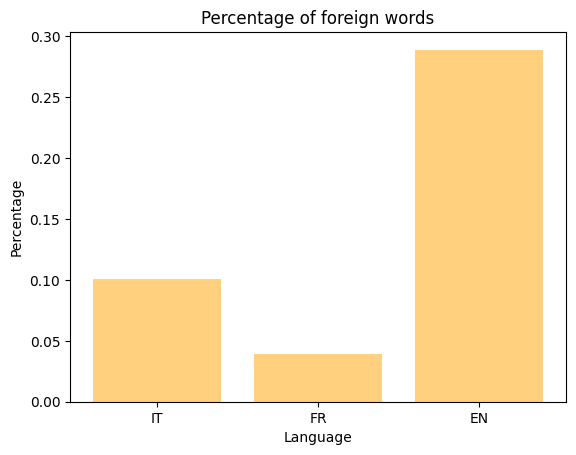

In [62]:

words_fr = set()
with open("../dicts/dictionary.csv", encoding="utf-8") as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            words_fr.add(word)

words_it = set()
with open("../dicts/parole_uniche.txt", encoding="utf-8") as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            words_it.add(word)

words_en = set()
with open("../dicts/words_alpha.txt", encoding="utf-8") as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            words_en.add(word)

words_de = set()
with open("../dicts/ngerman.txt", encoding="utf-8") as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            words_de.add(word)

with open("../scripts/comments.json", "r", encoding="utf-8") as f:
    comments = json.load(f)

words_GSW = set(NOAH_frequencies.keys())


print(f"FR: {len(words_fr)}, IT: {len(words_it)}, EN: {len(words_en)}, GSW: {len(words_GSW)}, DE: {len(words_de)}")
print("other langs", len((words_fr.union(words_it).union(words_en))))
print("other langs - GSW & DE", len((words_fr.union(words_it).union(words_en).difference(words_GSW.union(words_de)))))

IT_in_buenzli = {}
FR_in_buenzli = {}
EN_in_buenzli = {}
GSW_in_buenzli = {}
other_in_buenzli = {}

for comment in comments:
    if comment["language"] != "GSW":
        #print(f"Skipping {comment['language']} comment")
        continue
    sentence = comment["body"]
    for word in sentence.split(" "):
        word = word.lower()
        if len(word) > 0 and word[0] == "/":
            word = word[1:]
        if word in words_GSW or word in words_de:
            if word not in GSW_in_buenzli:
                GSW_in_buenzli[word] = [comment["body"]]
            else:
                GSW_in_buenzli[word].append(comment["body"])
        elif word in words_en:
            if word not in EN_in_buenzli:
                EN_in_buenzli[word] = [comment["body"]]
            else:
                EN_in_buenzli[word].append(comment["body"])
        elif word in words_fr:
            if word not in FR_in_buenzli:
                FR_in_buenzli[word] = [comment["body"]]
            else:
                FR_in_buenzli[word].append(comment["body"])
        elif word in words_it:
            if word not in IT_in_buenzli:
                IT_in_buenzli[word] = [comment["body"]]
            else:
                IT_in_buenzli[word].append(comment["body"])
        else:
            if word not in other_in_buenzli:
                other_in_buenzli[word] = [comment["body"]]
            else:
                other_in_buenzli[word].append(comment["body"])


print(f"FR loan words: {len(FR_in_buenzli)}, IT loan words: {len(IT_in_buenzli)}, EN loan words: {len(EN_in_buenzli)}, {len(GSW_in_buenzli)}, {len(other_in_buenzli)}")
for word, sample_sents in sorted(EN_in_buenzli.items(), key=lambda x: len(x[1]), reverse=True)[:50]:
    print(word)

# make a plot with a bar for each foreign language and the number of words

import matplotlib.pyplot as plt
import numpy as np

langs = ["IT", "FR", "EN"]
counts = [len(IT_in_buenzli)/total_words, len(FR_in_buenzli)/total_words, len(EN_in_buenzli)/total_words]
counts = [c * 100 for c in counts]
plt.title("Percentage of foreign words")

plt.xlabel("Language")
plt.ylabel("Percentage")
plt.bar(langs, counts, alpha=0.5, color='orange')
plt.savefig('Foreign_Words.png')
plt.show()

In [20]:
"""
Utility data structures
"""

buenzli_words = set(buenzli_frequencies.keys())
NOAH_words = set(NOAH_frequencies.keys())

buenzli_words_not_in_NOAH = buenzli_words - NOAH_words
NOAH_words_not_in_buenzli = NOAH_words - buenzli_words

normalized_NOAH_frequencies = {word: freq / len(NOAH_words) for word, freq in NOAH_frequencies.items()}
normalized_buenzli_frequencies = {word: freq / len(buenzli_words) for word, freq in buenzli_frequencies.items()}

print(buenzli_frequencies["kreiswichs"])
print(buenzli_frequencies["chreiswichs"]) # A literal german translation of the english "circlejerk"
print(buenzli_frequencies["pfoste"])
print(buenzli_frequencies["pfostiere"])
print(buenzli_frequencies["post"])
print(buenzli_frequencies["enjoyer,"])





1
3
114
14
308
1
{'bettwanze': 8.878629139660837e-05, 'und': 0.12367930391547545, 'vire': 4.4393145698304184e-05, 'im': 0.036047234307022995, 'gepäck': 4.4393145698304184e-05, 'vorsorg': 4.4393145698304184e-05, 'wer': 0.0009322560596643878, 'jetzt': 0.0035514516558643344, 'sini': 0.004084169404243985, 'sommerferie': 4.4393145698304184e-05, 'buecht': 4.4393145698304184e-05, ',': 0.19546302050963332, 'sött': 0.00039953831128473763, 'a': 0.01251886708692178, 'möglichi': 8.878629139660837e-05, 'unerwünschti': 4.4393145698304184e-05, 'gescht': 0.0004439314569830418, 'dänke': 8.878629139660837e-05, ':': 0.01784604457071828, 'epidemie': 4.4393145698304184e-05, 'wire': 4.4393145698304184e-05, 'wanze': 4.4393145698304184e-05, 'sind': 0.025614845067921513, 'vormarsch': 4.4393145698304184e-05, '.': 0.2240078131936429, 'villi': 8.878629139660837e-05, 'buechet': 4.4393145698304184e-05, 'griechäland': 4.4393145698304184e-05, 'wäge': 0.0005327177483796502, 'de': 0.08732131758856433, 'günschtige': 4.4